In [3]:
import qutip as qt
import matplotlib.pyplot as plt
import numpy as np

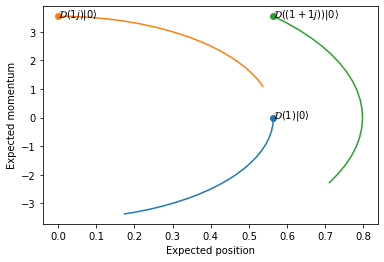

In [50]:
# Problem 2
N = 10
m = 1
omega = 2 * np.pi
hbar = 1
def coherent_state(alpha):
    return qt.displace(N, alpha) * qt.basis(N, 0)
a = qt.destroy(N)
x = np.sqrt(hbar / 2 / m / omega) * (a + a.dag())
p = (-1j) * np.sqrt(hbar * m * omega / 2) * (a - a.dag())

for alpha in [1, 1j, 1+1j]:
    Psi = coherent_state(alpha)
    expected_x = qt.expect(x, Psi)
    expected_p = qt.expect(p, Psi)
    plt.scatter(expected_x, expected_p)
    plt.annotate(f"$\\mathcal {{ D }} ({alpha})| 0 \\rangle$", [expected_x, expected_p])
# Don't call plt.show() yet, because we want to see how these states change in time

def U(t):
    return (-1j * omega * t * (a.dag() * a + qt.qeye(N) / 2.)).expm()

for alpha in [1, 1j, 1+1j]:
    expected_x = []
    expected_p = []
    for t in np.linspace(0, 0.2, 20):
        Psi = U(t) * coherent_state(alpha)
        expected_x.append(qt.expect(x, Psi))
        expected_p.append(qt.expect(p, Psi))
    plt.plot(expected_x, expected_p)
plt.xlabel("Expected position")
plt.ylabel("Expected momentum")
plt.show()